# PROJECT --- WORLD HAPPINESS DAY DATASET

In [142]:
#import libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [143]:
#load the dataset
whd_set = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
whd_set

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [144]:
#display number of rows and columns
whd_set.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [145]:
#change the column names of dataset
whd_set.rename(columns = {'Country':'country', 'Region':'region', 'Happiness Rank':'happiness_rank', 'Happiness Score':'happiness_score', 'Standard Error':'standard_error', 'Economy (GDP per Capita)':'economy', 'Family':'family', 'Health (Life Expectancy)':'health', 'Freedom':'freedom', 'Trust (Government Corruption)':'trust', 'Generosity':'generosity', 'Dystopia Residual':'dystopia_residual'},inplace=True)
whd_set

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [146]:
#display number of rows and columns
whd_set.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy', 'family', 'health', 'freedom', 'trust',
       'generosity', 'dystopia_residual'],
      dtype='object')

In [147]:
#display number of rows and columns of dataset
whd_set.shape

(158, 12)

In [148]:
#display datatypes of columns
whd_set.dtypes

country               object
region                object
happiness_rank         int64
happiness_score      float64
standard_error       float64
economy              float64
family               float64
health               float64
freedom              float64
trust                float64
generosity           float64
dystopia_residual    float64
dtype: object

In [149]:
#display information of columns
whd_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            158 non-null    object 
 1   region             158 non-null    object 
 2   happiness_rank     158 non-null    int64  
 3   happiness_score    158 non-null    float64
 4   standard_error     158 non-null    float64
 5   economy            158 non-null    float64
 6   family             158 non-null    float64
 7   health             158 non-null    float64
 8   freedom            158 non-null    float64
 9   trust              158 non-null    float64
 10  generosity         158 non-null    float64
 11  dystopia_residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [150]:
#display sum of null values in columns
whd_set.isnull().sum()

country              0
region               0
happiness_rank       0
happiness_score      0
standard_error       0
economy              0
family               0
health               0
freedom              0
trust                0
generosity           0
dystopia_residual    0
dtype: int64

<AxesSubplot:>

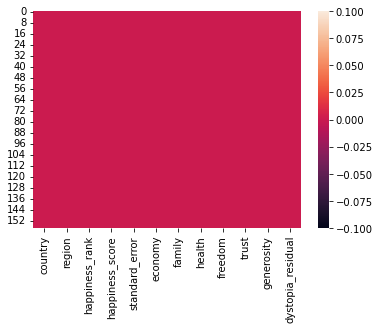

In [151]:
#display heatmap of null values in columns
sb.heatmap(whd_set.isnull())

In [152]:
#seperate columns into numeric and categorical dataset.
numeric_data = whd_set.select_dtypes(include=[np.number])
categorical_data = whd_set.select_dtypes(exclude=[np.number])

In [153]:
#columns of categorical dataset.
categorical_data.columns

Index(['country', 'region'], dtype='object')

In [154]:
#columns of numeric dataset.
numeric_data.columns

Index(['happiness_rank', 'happiness_score', 'standard_error', 'economy',
       'family', 'health', 'freedom', 'trust', 'generosity',
       'dystopia_residual'],
      dtype='object')

In [155]:
#display categorical dataset.
categorical_data

,country,region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


In [205]:
#display numeric dataset.
numeric_data

,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
0,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [156]:
#apply encoding technique on string or object variable.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
list1 = ['country','region']
for val in list1:
    categorical_data[val] = le.fit_transform(categorical_data[val].astype(str))
categorical_data    

,country,region
0,135,9
1,58,9
2,37,9
3,105,9
4,24,5
...,...,...
153,118,8
154,13,8
155,136,4
156,21,8


In [158]:
#summary statistics.
numeric_data.describe()

,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


happiness_rank          AxesSubplot(0.125,0.536818;0.133621x0.343182)
happiness_score      AxesSubplot(0.285345,0.536818;0.133621x0.343182)
standard_error        AxesSubplot(0.44569,0.536818;0.133621x0.343182)
economy              AxesSubplot(0.606034,0.536818;0.133621x0.343182)
family               AxesSubplot(0.766379,0.536818;0.133621x0.343182)
health                     AxesSubplot(0.125,0.125;0.133621x0.343182)
freedom                 AxesSubplot(0.285345,0.125;0.133621x0.343182)
trust                    AxesSubplot(0.44569,0.125;0.133621x0.343182)
generosity              AxesSubplot(0.606034,0.125;0.133621x0.343182)
dystopia_residual       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

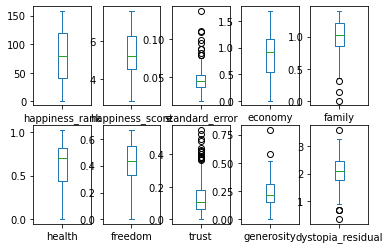

In [159]:
#display boxplot of numeric columns.
numeric_data.plot(kind='box',subplots=True,layout=(2,5))

In [160]:
#display zscore for removing outliers.
from scipy.stats import zscore
z = np.abs(zscore(numeric_data))
z

,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
0,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...
153,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [161]:
#threshold for zscore values ----> above 3 are considerd outliers.
threshold = 3 
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [162]:
#removing outliers.
numeric_data_new = numeric_data[(z<3).all(axis=1)]  

In [163]:
#display numeric dataset rows and columns.
numeric_data.shape

(158, 10)

In [164]:
#display new numeric dataset rows and columns without outliers.
numeric_data_new.shape

(149, 10)

In [165]:
#assign new numeric dataset into old numeric dataset.
numeric_data = numeric_data_new
numeric_data.shape

(149, 10)

In [166]:
#display skew of numeric columns.
numeric_data.skew()

happiness_rank       0.003268
happiness_score      0.169740
standard_error       1.243048
economy             -0.390657
family              -0.811340
health              -0.747711
freedom             -0.400867
trust                1.272530
generosity           0.654710
dystopia_residual   -0.021144
dtype: float64

array([[<AxesSubplot:title={'center':'happiness_rank'}>,
        <AxesSubplot:title={'center':'happiness_score'}>,
        <AxesSubplot:title={'center':'standard_error'}>],
       [<AxesSubplot:title={'center':'economy'}>,
        <AxesSubplot:title={'center':'family'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'freedom'}>,
        <AxesSubplot:title={'center':'trust'}>,
        <AxesSubplot:title={'center':'generosity'}>],
       [<AxesSubplot:title={'center':'dystopia_residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

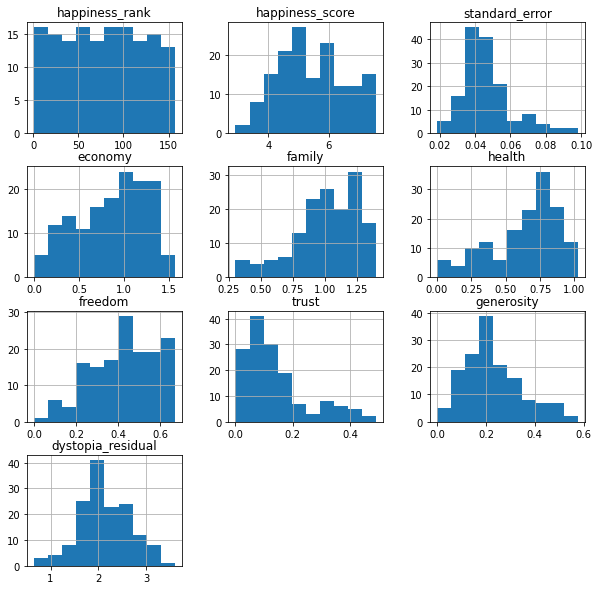

In [167]:
#display histogram plot of numeric columns.
numeric_data.hist(figsize=(10,10),bins=10)

In [168]:
#remove skewness of standard error column using boxcox.
from scipy.stats import boxcox
numeric_data['standard_error']=boxcox(numeric_data['standard_error'],0)

<AxesSubplot:ylabel='Frequency'>

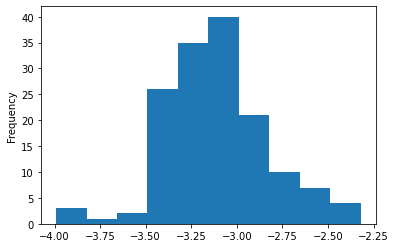

In [169]:
#plot the histogram of standard error column after remove skewness.
numeric_data['standard_error'].plot.hist()

In [170]:
#display the skew of numeric columns.
numeric_data.skew()

happiness_rank       0.003268
happiness_score      0.169740
standard_error       0.123220
economy             -0.390657
family              -0.811340
health              -0.747711
freedom             -0.400867
trust                1.272530
generosity           0.654710
dystopia_residual   -0.021144
dtype: float64

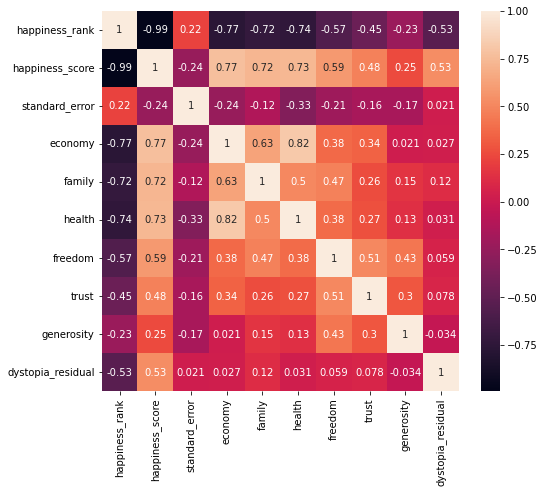

In [171]:
#display correlations of numeric columns.
corr_hmap = numeric_data.corr()
plt.figure(figsize=(8,7))
sb.heatmap(corr_hmap,annot=True)
plt.show()

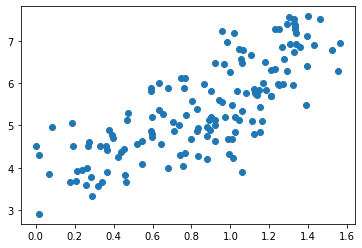

In [172]:
#display scatter plot between two variables.
plt.scatter(numeric_data['economy'],numeric_data['happiness_score'])
plt.show()

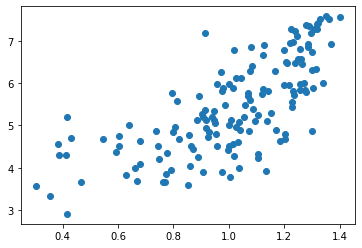

In [173]:
#display scatter plot between two variables.
plt.scatter(numeric_data['family'],numeric_data['happiness_score'])
plt.show()

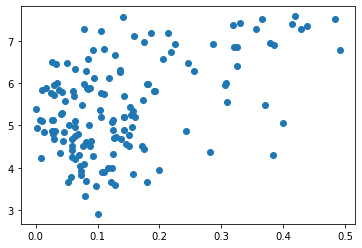

In [174]:
#display scatter plot between two variables.
plt.scatter(numeric_data['trust'],numeric_data['happiness_score'])
plt.show()

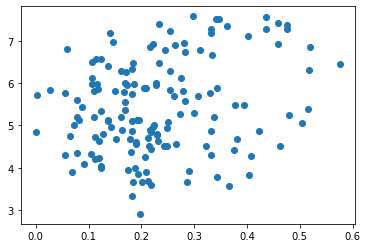

In [175]:
#display scatter plot between two variables.
plt.scatter(numeric_data['generosity'],numeric_data['happiness_score'])
plt.show()

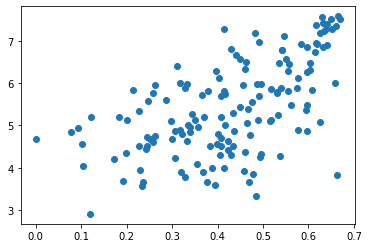

In [176]:
plt.scatter(numeric_data['freedom'],numeric_data['happiness_score'])
plt.show()

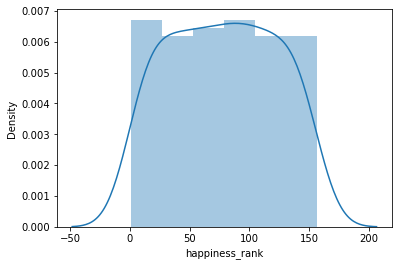

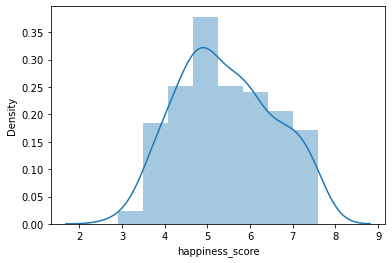

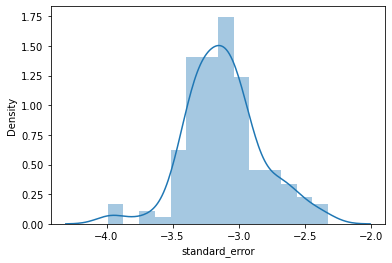

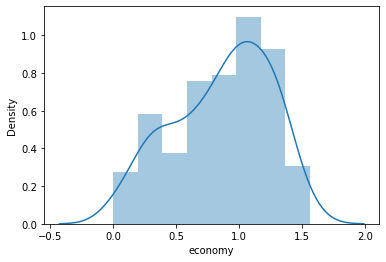

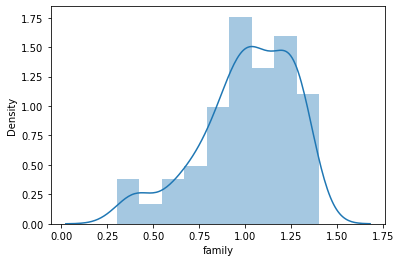

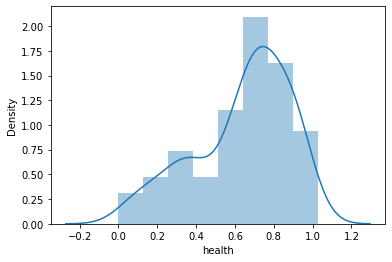

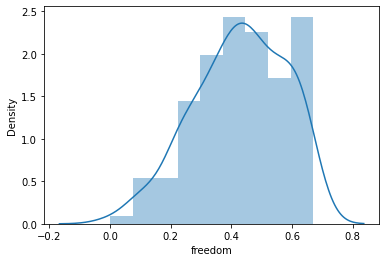

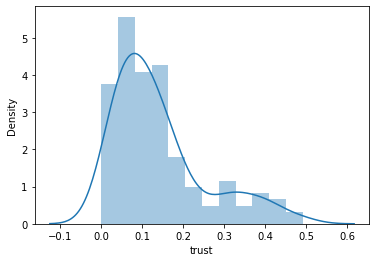

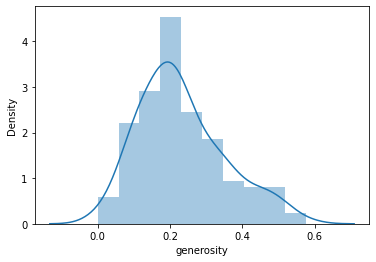

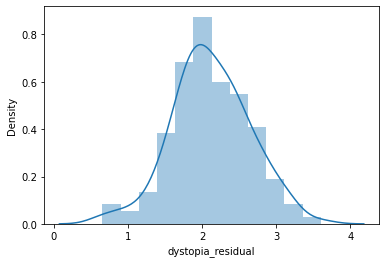

In [177]:
#display dist plot of each numeric columns.
for i in numeric_data:
    plt.figure()
    sb.distplot(numeric_data[i])

In [178]:
#combine numeric and categorical dataset in dataframe
df1 = pd.DataFrame(data = numeric_data)
df2 = pd.DataFrame(data = categorical_data)

In [179]:
df_new = df1.join(df2)

In [181]:
df_new

,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual,country,region
0,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,135,9
1,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,58,9
2,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,37,9
3,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,105,9
4,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,24,5
...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,66,8
151,152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,20,8
152,153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,0,7
154,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,13,8


In [187]:
#display all input variable rows and columns
x = df_new.iloc[:,df_new.columns!='happiness_score']
x.head()

,happiness_rank,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual,country,region
0,1,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,135,9
1,2,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,58,9
2,3,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,37,9
3,4,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,105,9
4,5,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,24,5


In [190]:
#display output variable rows and columns.
y = df_new.iloc[:,df_new.columns=='happiness_score']
y.head()

,happiness_score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427


In [191]:
#display number of input variable rows and columns
x.shape

(149, 11)

In [192]:
#display number of output variable rows and columns
y.shape

(149, 1)

In [193]:
#split the dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=47)

In [194]:
#display number of input variable rows and columns of x_train
x_train.shape

(119, 11)

In [195]:
#display number of output variable rows and columns of y_train
y_train.shape

(119, 1)

In [196]:
#display number of input variable rows and columns of x_test
x_test.shape

(30, 11)

In [197]:
#display number of output variable rows and columns of y_test
y_test.shape

(30, 1)

In [198]:
#apply linear regression model
lm = LinearRegression()

In [199]:
#apply fit method of linear regression model 
lm.fit(x_train,y_train)

LinearRegression()

In [200]:
#display coefficient values
lm.coef_

array([[-9.46944438e-06, -7.56357097e-05,  9.99735257e-01,
         9.99592849e-01,  9.99349928e-01,  9.99243585e-01,
         9.99679120e-01,  1.00003669e+00,  9.99623595e-01,
        -7.91581218e-07, -1.28851114e-05]])

In [201]:
#display intercept values
lm.intercept_

array([0.00278701])

In [202]:
#display score of linear model
lm.score(x_train,y_train)

0.9999999382390226

In [204]:
#predict the value
pred = lm.predict(x_test)
print("predicted happiness score:",pred)
print("actual happiness score",y_test)

predicted happiness score: [[7.2775993 ]
 [7.58666424]
 [5.88904831]
 [7.4058785 ]
 [6.98254081]
 [6.12282289]
 [5.68865601]
 [4.43549806]
 [5.75431492]
 [6.93725532]
 [4.51705511]
 [7.52197326]
 [6.29476396]
 [5.95973348]
 [4.6939692 ]
 [4.79954191]
 [5.42860153]
 [7.56070065]
 [3.9947304 ]
 [3.6559583 ]
 [4.89749174]
 [3.84492391]
 [5.98373434]
 [5.82826857]
 [4.36905315]
 [7.22559772]
 [4.68065795]
 [4.87430422]
 [4.2966286 ]
 [4.71469724]]
actual happiness score      happiness_score
10             7.278
0              7.587
51             5.889
5              7.406
15             6.983
42             6.123
66             5.689
123            4.436
62             5.754
18             6.937
119            4.517
3              7.522
38             6.295
48             5.960
108            4.694
103            4.800
72             5.429
1              7.561
137            3.995
149            3.656
96             4.898
143            3.845
46             5.984
56             5.828
125 

In [206]:
#display MAE, MSE and RMSE 
print('error:')

print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squared error',mean_squared_error(y_test,pred))

print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 0.0002645198086055049
mean squared error 9.139920487350821e-08
Root mean squared error 0.0003023230141314224


In [207]:
#apply regularization techniques.
from sklearn.linear_model import Lasso,Ridge,ElasticNet

#default value of alpha is 1.0
ls = Lasso(alpha=.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso = ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print("mean squared error",np.sqrt(mean_squared_error(y_test,predlasso)))

0.9999706703602036
4.563885931163336e-05
mean squared error 0.006755653877429879


In [208]:
ls.coef_

array([-1.19789374e-03, -2.09674076e-03,  9.56328306e-01,  9.49495943e-01,
        9.42884373e-01,  9.48930432e-01,  9.55914806e-01,  9.54876400e-01,
        9.50941782e-01, -3.91303060e-06,  3.34088676e-04])

In [209]:
rd = Ridge(alpha=.0001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predridge = rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print("mean squared error",np.sqrt(mean_squared_error(y_test,predridge)))

0.9999999361466261
1.0706014163204899e-07
mean squared error 0.00032720046092884553


In [210]:
rd.coef_

array([[-1.95131631e-05, -1.04797204e-04,  9.99367594e-01,
         9.99171059e-01,  9.98867889e-01,  9.98816320e-01,
         9.99309155e-01,  9.99653605e-01,  9.99212476e-01,
        -8.17612464e-07, -1.00626429e-05]])

In [211]:
#elasticnet is a combination of both Lasso and Ridge
enr = ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred = enr.predict(x_test)
print(enr.score(x_train,y_train))
print(mean_squared_error(y_test,enrpred))
print("mean squared error",np.sqrt(mean_squared_error(y_test,enrpred)))

0.9999718833034086
4.3599257787003895e-05
mean squared error 0.006602973404989898


In [212]:
enr.coef_

array([-1.17331369e-03, -2.73556059e-03,  9.57162040e-01,  9.50627036e-01,
        9.43811329e-01,  9.49868028e-01,  9.56794379e-01,  9.55707967e-01,
        9.51966522e-01, -3.83260076e-06,  3.21490038e-04])

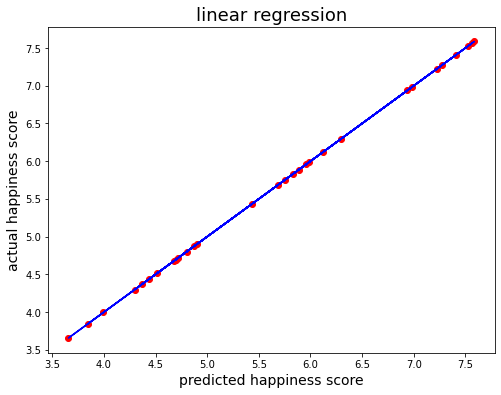

In [215]:
plt.figure(figsize=(8,6))
plt.scatter(x=pred, y=y_test, color = 'r')
plt.plot(pred,pred,color='b')
plt.xlabel("predicted happiness score",fontsize=14)
plt.ylabel("actual happiness score",fontsize=14)
plt.title("linear regression",fontsize=18)
plt.show()